In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def to_lowercase(text):
    return text.lower()

def remove_emails(text):
    return re.sub(r'\S+@\S+', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

def remove_html(text):
    return re.sub(r'<.*?>', '', text)

def remove_special_chars(text):
    return re.sub(f'[{re.escape(string.punctuation)}]', '', text)

def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_stopwords(text):
    tokens = text.split()
    filtered = [w for w in tokens if w not in stop_words]
    return ' '.join(filtered)

def lemmatize_text(text):
    tokens = text.split()
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(lemmatized)

def remove_emojis(text):
    emoji_pattern = re.compile("[^\u0000-\u007F]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def clean_text(text):
    text = to_lowercase(text)
    text = remove_emails(text)
    text = remove_urls(text)
    text = remove_html(text)
    text = remove_special_chars(text)
    text = remove_digits(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    text = remove_emojis(text)
    text = text.strip()
    return text


# Data Loading

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [13]:
df = pd.read_csv('https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download/raw/refs/heads/master/IMDB-Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [14]:
df.shape

(50000, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## Preprocessing

In [27]:
df['cleaned_review'] = df['review'].apply(clean_text)

In [28]:
df.head(5)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [29]:
for before, after in zip(df['review'][:5], df['cleaned_review'][:5]):
    print("Original:", before)
    print("Cleaned:", after)
    print("\n")


Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

In [30]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## Data Visualisation 

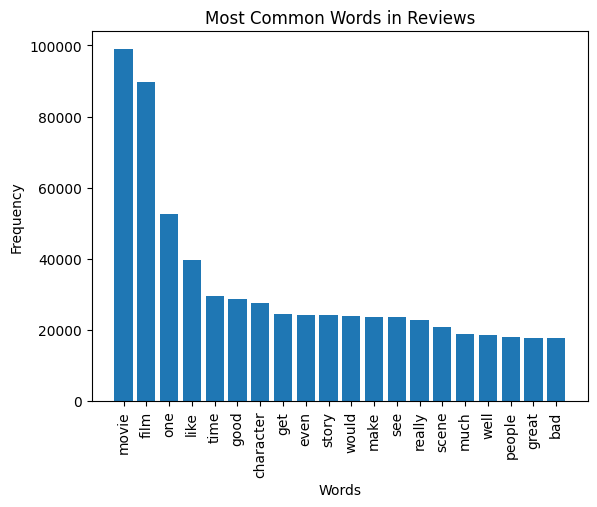

In [34]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = ' '.join(df['cleaned_review']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title('Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()  

## Model Building and Word Embedding

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
X_train.shape, X_test.shape

((40000, 5000), (10000,))

In [59]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'LinearSVC': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results.append({'Model': name, 'Accuracy': acc})
    print(f"{name} Classification Report:\n", classification_report(y_val, preds))

results_df = pd.DataFrame(results)
display(results_df)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

LinearSVC Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      5000
           1       0.87      0.88      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      5000
           1       0.85      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg

,Model,Accuracy
0,Logistic Regression,0.8860
1,LinearSVC,0.8774
2,Random Forest,0.8489


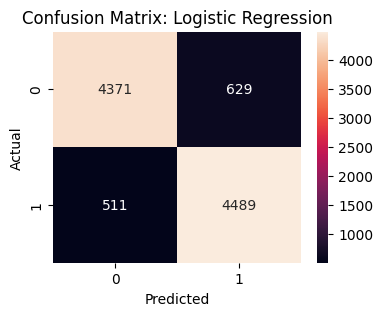

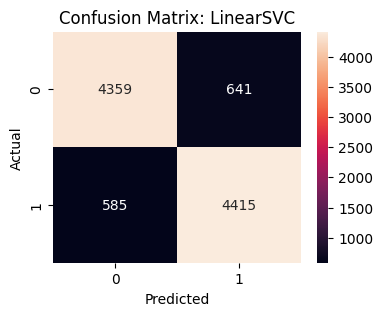

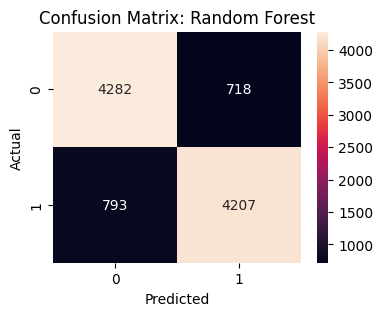

In [60]:
for name, model in models.items():
    preds = model.predict(X_val)
    cm = confusion_matrix(y_val, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [61]:
import joblib

# Save the Logistic Regression model
best_model = models['Logistic Regression']
joblib.dump(best_model, 'imdb_sentiment_classifier.pkl')

# Save the TfidfVectorizer too (since it's needed to transform future inputs)
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']